In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
import sklearn.ensemble as ensemble
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('penguins.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.drop(columns = ['island','sex'], inplace = True)

In [4]:
df.isna().sum()

species              0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [5]:
df = df.dropna()

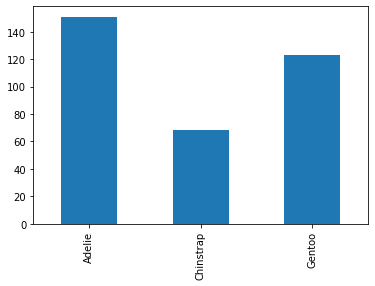

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64


In [6]:
df['species'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

print(df['species'].value_counts())

In [7]:
X = df.drop('species', axis = 1)
y = df['species']

In [8]:
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

<AxesSubplot:xlabel='species', ylabel='count'>

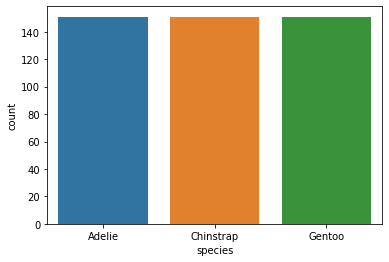

In [9]:
sns.countplot(x = y_smote)

In [10]:
X_train, X_test, y_train, y_test = tts(X_smote, y_smote, test_size = 0.3, random_state = 143)

In [11]:
et = ensemble.ExtraTreesClassifier()
et

ExtraTreesClassifier()

In [12]:
et.fit(X_train, y_train)
et.score(X_train, y_train)

1.0

In [13]:
et_pred = et.predict(X_test)

In [14]:
print("\nExtra Trees Classifier:")
print("Accuracy score:", accuracy_score(y_test, et_pred))
print("Classification Report:\n", classification_report(y_test, et_pred))


Extra Trees Classifier:
Accuracy score: 0.9926470588235294
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        45
   Chinstrap       1.00      0.98      0.99        45
      Gentoo       1.00      1.00      1.00        46

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



In [15]:
# df.rename(columns={'culmen_length_mm': 'culmen_length', 'culmen_depth_mm': 'culmen_depth', 'flipper_length_mm': 'flipper_length', 'body_mass_g': 'body_mass'}, inplace=True)

In [16]:
# check = df[df['species'] == 'Chinstrap']
# check

In [17]:
# low = df['body_mass'].min()
# high = df['body_mass'].max()
# print(low)
# print(high)